<a href="https://colab.research.google.com/github/cheikhb/ML_Projects/blob/main/R_H2O_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("readxl")
install.packages("h2o")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘RCurl’




In [4]:
library(tidyverse)
library(readxl)
library(h2o)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: ‘h2o’


The following objects are masked from ‘package:stats’:

    cor, sd, var


The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse

Lets load our dataset

In [7]:
path <- '/content/bank_term_deposit_marketing_analysis.xlsx'
sheets <- excel_sheets(path)

Lets now explore our data

In [8]:
sheets %>%
    map(~ read_excel(path  = path, sheet = .)) %>%
    set_names(sheets)

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...

New names:
* `` -> ...2
* `` -> ...4



BANK MARKETING ANALYSIS PROCEDURE
<chr>
NA
STEP 1: COLLECT INFORMATION
"1) CLIENT INFORMATION: AGE, JOB, MARITAL STATUS, EDUCATION LEVEL"
"2) CLIENT LOAN HISTORY: DEFAULT HISTORY, HOME LOAN, PERSONAL LOAN, CURRENT BALANCE"
"3) MARKETING HISTORY: CONTACT TYPE, DAY LAST CONTACT, MONTH LAST CONTACT, LAST CONTACT DURATION"
4) SUBSCRIPTION HISTORY: ENROLLED IN TERM LOAN? (Y/N)
NA
STEP 2: MERGE INFORMATION
1) PERFORM VLOOKUP


Now i am going to join all tables togather

In [10]:
data_joined_tbl <- sheets[4:7] %>%
    map(~ read_excel(path = path, sheet = .)) %>%
    reduce(left_join)

Joining, by = "ID"

Joining, by = "ID"

Joining, by = "ID"



Lets take a look to our new dataset

In [11]:
head(data_joined_tbl)

ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
2841,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


To start our ML project we need to start the h2o cluster and set the memory size as needed

In [12]:
h2o.init(max_mem_size = "4g")


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/Rtmp7Lt4jJ/file3748351350/h2o_UnknownUser_started_from_r.out
    /tmp/Rtmp7Lt4jJ/file37438ac7fb/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: .... Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         4 seconds 36 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.0.1 
    H2O cluster version age:    1 month and 11 days  
    H2O cluster name:           H2O_started_from_R_root_lbg450 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   4.00 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensi

Lets prepare ou data for analysis

First we need to convert all non numerical data type te factor

In [13]:
data_joined_tbl <- data_joined_tbl %>% 
    mutate_if(is.character, as.factor)

Lets create our training data

In [14]:
train <- as.h2o(data_joined_tbl)

  |======================================================================| 100%


Lets take a look to our train data

In [15]:
h2o.describe(train)

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,enum,0,1,0,0,0,45210,NA,NA,45211
AGE,int,0,0,0,0,18,95,4.093621e+01,10.6187620,NA
JOB,enum,0,5171,0,0,0,11,NA,NA,12
MARITAL,enum,0,5207,0,0,0,2,NA,NA,3
EDUCATION,enum,0,6851,0,0,0,3,NA,NA,4
DEFAULT,enum,0,44396,0,0,0,1,1.802659e-02,0.1330489,2
BALANCE,int,0,3514,0,0,-8019,102127,1.362272e+03,3044.7658292,NA
HOUSING,enum,0,20081,0,0,0,1,5.558382e-01,0.4968778,2
LOAN,enum,0,37967,0,0,0,1,1.602265e-01,0.3668200,2


Now we are going to set x and y for analysis et and remove all columns we do not need for analysis

In [16]:
y <- "TERM_DEPOSIT"

x <- setdiff(names(train), c(y, "ID"))

Now we can start oyr h2o AutoML 

In [17]:
aml <- h2o.automl(
    y = y, 
    x = x, 
    training_frame = train,
    project_name = "term_deposit",
    max_runtime_secs = 300,
    balance_classes = TRUE,
    #max_models = 10,
    seed = 1)

  |======================================================================| 100%


Done!
Now lets create a variable for le AutoML loadboaard et look our predictors

In [18]:
lb <- aml@leaderboard

print(lb)

print(lb, n = nrow(lb))

                                             model_id       auc   logloss
1 StackedEnsemble_BestOfFamily_AutoML_20201120_173801 0.9323430 0.2177267
2    StackedEnsemble_AllModels_AutoML_20201120_173801 0.9307606 0.2089728
3      XGBoost_grid__1_AutoML_20201120_173801_model_1 0.9299841 0.2118894
4      XGBoost_grid__1_AutoML_20201120_173801_model_2 0.9285936 0.2080283
5          GBM_grid__1_AutoML_20201120_173801_model_1 0.9224632 0.2151505
6                        GBM_5_AutoML_20201120_173801 0.9222259 0.3003686
      aucpr mean_per_class_error      rmse        mse
1 0.6195945            0.1710709 0.2557725 0.06541955
2 0.6228791            0.1766936 0.2522177 0.06361377
3 0.6044081            0.1720321 0.2565967 0.06584187
4 0.6069524            0.1782205 0.2543559 0.06469690
5 0.5888400            0.1900694 0.2589978 0.06707985
6 0.5736805            0.1743422 0.3011140 0.09066965

[21 rows x 7 columns] 
                                              model_id       auc   logloss
1  St

Now as we can see the best model is StackedEnsemble Modele; lets explore it 

In [20]:
model_ids <- as.data.frame(aml@leaderboard$model_id)[,1]
se <- h2o.getModel(grep("StackedEnsemble_AllModels", model_ids, value = TRUE)[1])
metalearner <- h2o.getModel(se@model$metalearner$name)



Lets plot our metalearner

variable,relative_importance,scaled_importance,percentage
<chr>,<dbl>,<dbl>,<dbl>
XGBoost_grid__1_AutoML_20201120_173801_model_1,0.38621390,1.00000000,0.20901475
GBM_5_AutoML_20201120_173801,0.22146030,0.57341360,0.11985190
DeepLearning_grid__3_AutoML_20201120_173801_model_1,0.20793385,0.53839038,0.11253153
XGBoost_grid__1_AutoML_20201120_173801_model_2,0.19274441,0.49906129,0.10431117
GBM_3_AutoML_20201120_173801,0.19119677,0.49505410,0.10347361
DeepLearning_grid__2_AutoML_20201120_173801_model_1,0.11788936,0.30524371,0.06380044
GBM_1_AutoML_20201120_173801,0.10253213,0.26548017,0.05548927
DRF_1_AutoML_20201120_173801,0.08633033,0.22352985,0.04672104
XGBoost_2_AutoML_20201120_173801,0.08130827,0.21052652,0.04400315


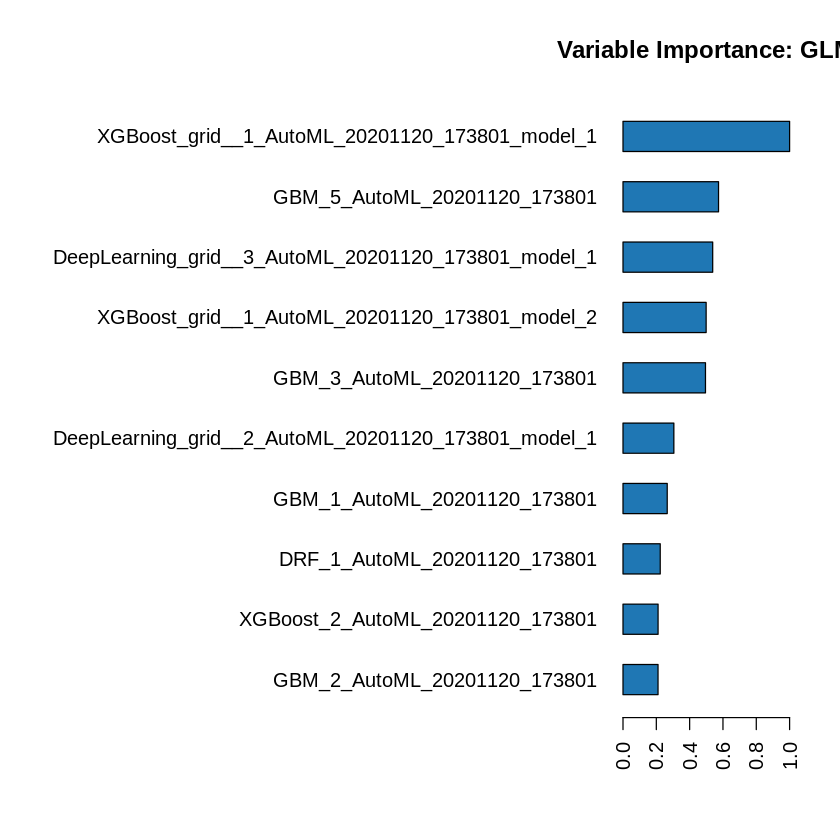

In [21]:
h2o.varimp(metalearner)

h2o.varimp_plot(metalearner)

To finish this analysis lets explore the Baselearner Variable Importance 

In [22]:
xgb <- h2o.getModel(grep("XGBoost", model_ids, value = TRUE)[1])

In [23]:
h2o.varimp(xgb)

variable,relative_importance,scaled_importance,percentage
<chr>,<dbl>,<dbl>,<dbl>
DURATION,12877.327148,1.0000000000,0.3242979620
BALANCE,3894.277832,0.3024135201,0.0980720882
DAY,3183.641113,0.2472284098,0.0801756694
POUTCOME.success,3070.571045,0.2384478556,0.0773281536
AGE,3017.367676,0.2343163019,0.0759882992
PDAYS,1695.403809,0.1316580521,0.0426964380
CONTACT.unknown,998.524597,0.0775412930,0.0251464833
CAMPAIGN,960.342346,0.0745762172,0.0241849152
HOUSING.no,727.157104,0.0564680151,0.0183124622


Lets plot the xgb to be more explainable for everyone 

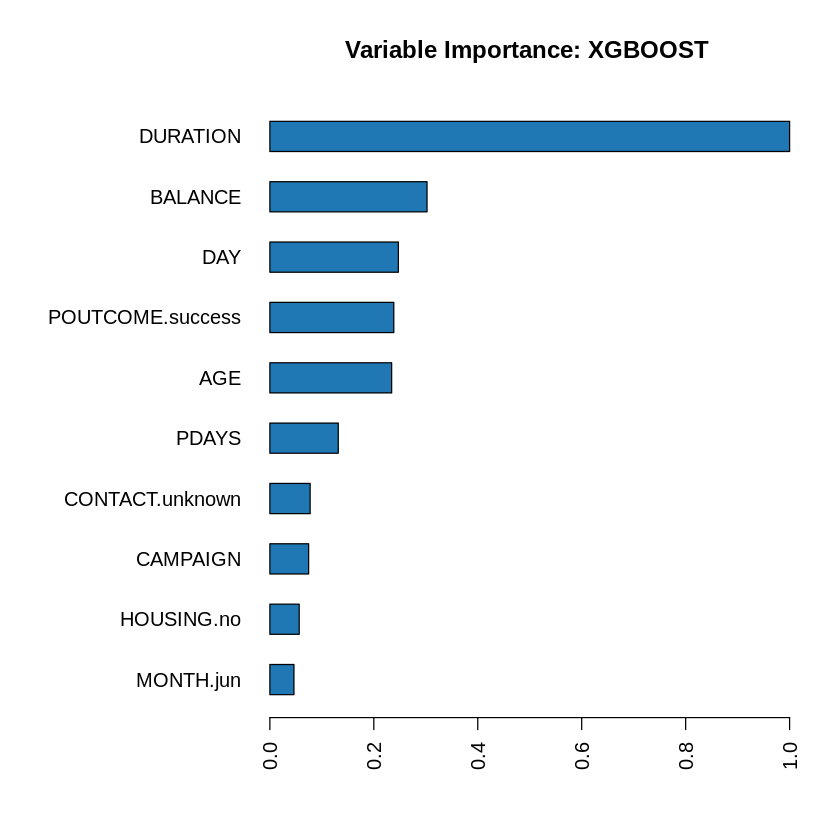

In [24]:
h2o.varimp_plot(xgb)